In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
#from gensim.models.doc2vec import LabeledSentence
#import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [36]:
df = pd.read_csv('twitterdataset.csv',encoding = 'latin')

In [37]:
df.head()

,ï»¿textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [38]:
# There are null values in selected_text column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ï»¿textID      31015 non-null  object
 1   text           31014 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      31015 non-null  object
dtypes: object(4)
memory usage: 969.3+ KB


In [40]:
df['text'] = df['text'].astype('str')

In [41]:
df.drop('selected_text', inplace=True, axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ï»¿textID  31015 non-null  object
 1   text       31015 non-null  object
 2   sentiment  31015 non-null  object
dtypes: object(3)
memory usage: 727.0+ KB


In [22]:
df.shape

(31015, 3)

In [23]:
df['sentiment'].value_counts()

neutral     12548
positive     9685
negative     8782
Name: sentiment, dtype: int64

In [24]:
df[df['sentiment']=='negative']

,ï»¿textID,text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought",negative
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative
...,...,...,...
30995,975554343f,I just noticed that They are so ridiculous,negative
30997,87737f8e62,i hate it when a website says the ticket prices are on another website and their not,negative
31004,036cd6abb0,"My eyes are starting to hurt. So late. But must reach 200 updates due to tweets sent to youuuu! Philippines tour, pleeease?",negative
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep but i try it",negative


In [25]:
df[df['sentiment']=='neutral']

,ï»¿textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
5,28b57f3990,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral
7,50e14c0bb8,Soooo high,neutral
8,e050245fbd,Both of you,neutral
10,2339a9b08b,"as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff",neutral
...,...,...,...
30999,a6687519e2,"ok outta all 981 of my followers, only about 10 of u ive talked to lol dont be shy i dont biteeee",neutral
31001,9a10e4813f,"Where`d the songs go on the site, I want 'Do You' on this computer too",neutral
31005,e965e50c60,My hair dresser passed away yesterday from breast cancer She was the greatest hair dresser I`d ever been to!,neutral
31006,b1c36b70a4,"I was supposed to go tomorrow tooooo, but have to use gas and ticket money to pay for car inspection fee.",neutral


In [26]:
df[df['sentiment']=='positive']

,ï»¿textID,text,sentiment
6,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,positive
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe... (is that possible!?),positive
11,16fab9f95b,I really really like the song Love Story by Taylor Swift,positive
21,e48b0b8a23,Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job. Can`t wait to have a dragon pet,positive
25,e00c6ef376,"the free fillin` app on my ipod is fun, im addicted",positive
...,...,...,...
31007,4d2de9d1af,The best thing I have ever done is carry and birth a child,positive
31008,0c2e7ab834,"..my mother just WON the City of Terrell, Texas District 2 `City Council` Seat ..i`m M.i.A lol HAPPY MOTHERS DAY",positive
31011,416863ce47,"All alone in this old house again. Thanks for the net which keeps me alive and kicking! Whoever invented the net, i wanna kiss your hair!",positive
31013,df1baec676,_sutra what is your next youtube video gonna be about? I love your videos!,positive


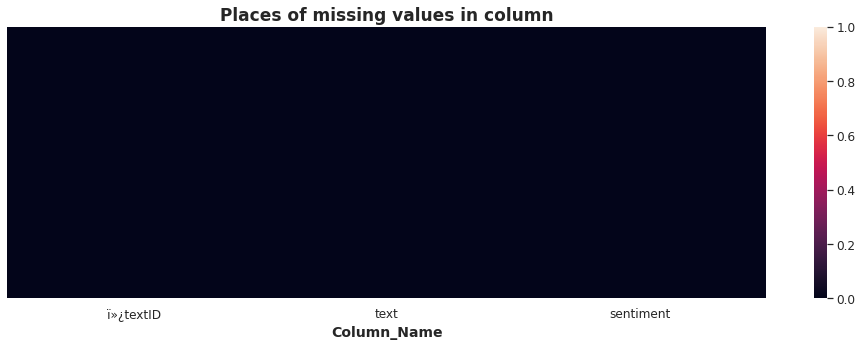

In [27]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

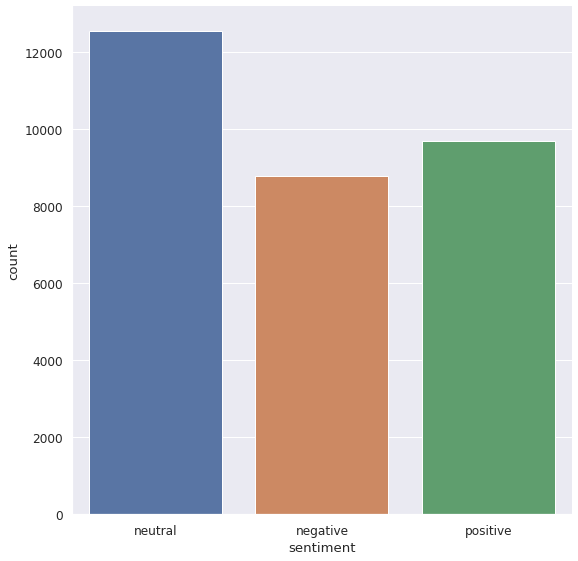

In [28]:
sns.set(font_scale=1.1)
sns.catplot("sentiment", data=df, kind="count", height=8)

In [32]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [44]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['text'], '@[\w]*')

In [45]:
df.head(2)

,ï»¿textID,text,sentiment,Tweet
0,cb774db0d1,"I`d have responded, if I were going",neutral,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego!!!


In [46]:
#remove http and urls
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [47]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [48]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [49]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [51]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet
df['Tweet']  = tokenized_tweet

In [52]:
df.head(2)

,ï»¿textID,text,sentiment,Tweet
0,cb774db0d1,"I`d have responded, if I were going",neutral,I d have respond if I were go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad I will miss you here in san diego


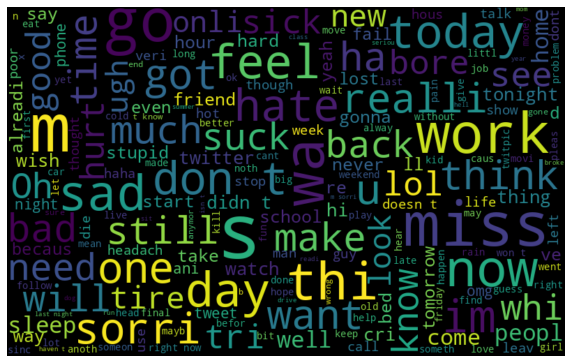

In [55]:
# create text from just negative tweets
normal_words = ' '.join([text for text in df['Tweet'][df['sentiment'] == 'negative']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

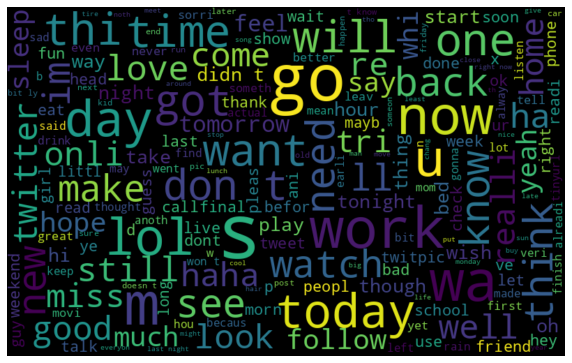

In [56]:
# create text from just neutral tweets
normal_words = ' '.join([text for text in df['Tweet'][df['sentiment'] == 'neutral']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

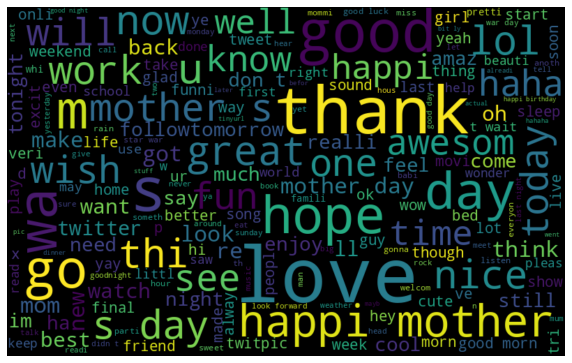

In [57]:
# create text from just positive tweets
normal_words = ' '.join([text for text in df['Tweet'][df['sentiment'] == 'positive']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
#Extracting features from cleaned tweets
new_df = df[['Tweet','sentiment']]

In [60]:
new_df.head()

,Tweet,sentiment
0,I d have respond if I were go,neutral
1,sooo sad I will miss you here in san diego,negative
2,my boss is bulli me,negative
3,what interview leav me alon,negative
4,son of whi couldn t they put them on the releas we alreadi bought,negative


In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/adarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                             [I,  ,  , h, v, e,  , r, e, p, n,  , f,  , I,  , w, e, r, e,  , g]
1                                                                                                                                             [ ,  , I,  , w, l, l,  ,  , u,  , h, e, r, e,  , n,  , n,  , e, g]
2                                                                                                                                                                                 [ , b,  ,  , b, u, l, l,  , e]
3                                                                                                                                                         [w, h,  , n, e, r, v, e, w,  , l, e, v,  , e,  , l, n]
4                                                                              [n,  , f,  , w, h,  , c, u, l, n,  ,  , h, e,  , p, u,  , h, e,  , n,  , h, e,  , r, 

In [63]:
new_df.head(6)

,Tweet,sentiment
0,I d have respond if I were go,neutral
1,sooo sad I will miss you here in san diego,negative
2,my boss is bulli me,negative
3,what interview leav me alon,negative
4,son of whi couldn t they put them on the releas we alreadi bought,negative
5,http www dothebounci com smf some shameless plug for the best ranger forum on earth,neutral


In [64]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (24812, 2)
valid shape :  (6203, 2)


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (24812, 18281)
X_train.shape :  (6203, 18281)
y_train.shape :  (24812,)
y_valid.shape :  (6203,)


In [66]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8140818958568434
Validation accuracy Score :  0.6558117040141866
              precision    recall  f1-score   support

    negative       0.59      0.68      0.63      1509
     neutral       0.68      0.61      0.64      2811
    positive       0.69      0.71      0.70      1883

    accuracy                           0.66      6203
   macro avg       0.65      0.67      0.66      6203
weighted avg       0.66      0.66      0.66      6203



In [67]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8386264710623892
Validation accuracy Score :  0.7098178300822183
              precision    recall  f1-score   support

    negative       0.64      0.72      0.68      1546
     neutral       0.72      0.67      0.69      2690
    positive       0.76      0.75      0.76      1967

    accuracy                           0.71      6203
   macro avg       0.71      0.72      0.71      6203
weighted avg       0.71      0.71      0.71      6203



In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.996896662905046
Validation accuracy Score :  0.7020796388844107
              precision    recall  f1-score   support

    negative       0.63      0.71      0.67      1549
     neutral       0.71      0.67      0.69      2660
    positive       0.76      0.74      0.75      1994

    accuracy                           0.70      6203
   macro avg       0.70      0.71      0.70      6203
weighted avg       0.71      0.70      0.70      6203



In [69]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.8933983556343704
Validation accuracy Score :  0.7114299532484282
              precision    recall  f1-score   support

    negative       0.58      0.78      0.66      1314
     neutral       0.80      0.65      0.71      3097
    positive       0.72      0.78      0.75      1792

    accuracy                           0.71      6203
   macro avg       0.70      0.73      0.71      6203
weighted avg       0.73      0.71      0.71      6203



In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.8756246977269063
Validation accuracy Score :  0.697726906335644
              precision    recall  f1-score   support

    negative       0.63      0.71      0.67      1548
     neutral       0.72      0.65      0.68      2779
    positive       0.73      0.75      0.74      1876

    accuracy                           0.70      6203
   macro avg       0.69      0.71      0.70      6203
weighted avg       0.70      0.70      0.70      6203



/home/adarsh/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Support Vector Machines,0.711430
4,Stochastic Gradient Decent,0.709818
2,Random Forest,0.702080
1,Logistic Regression,0.697727
3,Naive Bayes,0.655812
